# 분류데이터 생성

# make_classification
- 함수를 통하여 가상의 분류 데이터를 생성 할 수 있다.
- **주요함수인자**
  - <span style="color:red">**n_samples**</span> : 표본 데이터의 수. (디폴트:100)
  - <span style="color:red">**n_features**</span> : 독립 변수의 수. (디폴트:20)
  - <span style="color:red">**n_informative**</span> : 독립 변수중 종속 변수와 상관 관계가 있는 성분의 수. (디폴트:2)
  - **n_redundant** : 독립 변수중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수. (디폴트:0)
  - n_repeated : 독립 변수중 단순 중복된 성분의 수. (디폴트:0)
  - n_classes : 종속 변수의 클래스 수. (디폴트:2)
  - n_cluster_per_class : 클래스당 클러스터의 수. (디폴트:2)
  - weights : 각 클래스에 할당된 표본의 수
  - random_state : 랜덤 시드 값
  
  **[분류 문제에서의 다중 공선성]**
  - 분류 문제에서는 다중 공선성이 문제를 해결하는데에서 필수적으로 제거해야할 요소는 아니다.
  - 대부분의 경우 다중공선성이 분류 문제를 해결하는데 있어 문제가 되지는 않는다.
  - 다중공선성은 회귀 분석 문제에서 예측값을 추적 할 수 없는 문제를 만든다.

In [36]:
# 패키지 호출
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# 좌/우 분류

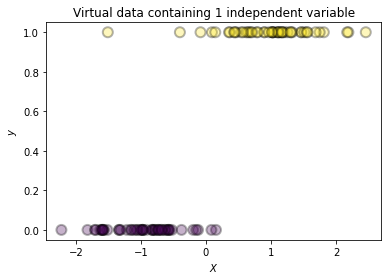

In [64]:
# 1개의 독립변수를 가진 가상 데이터
plt.title("Virtual data containing 1 independent variable")
X, y = make_classification(n_features=1, n_informative=1,
                          n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

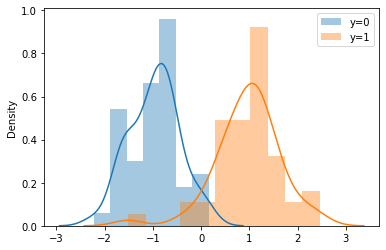

In [16]:
sns.distplot(X[y==0], label="y=0")
sns.distplot(X[y==1], label="y=1")
plt.legend()
plt.show()

# 상/하, 좌/우 선택분류

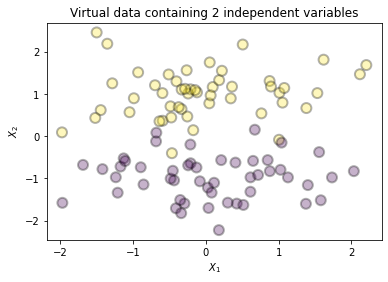

In [61]:
# 2개의 독립변수를 가진 가상 데이터
plt.title("Virtual data containing 2 independent variables")
X, y = make_classification(n_features=2, n_informative=1,
                          n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# [X_1] 과 [X_2] 를 비교하여 어느쪽 변수가 표본을 분리하는데 더 유익한지를 알 수 있다.
# 그림에서는 [X_2] 가 표본을 분리하는데 더 유리한 기준점을 가지고 있다.

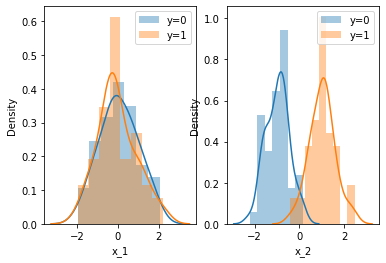

In [20]:
# x_! 의 사례
plt.subplot(121)
sns.distplot(X[y==0, 0], label="y=0")
sns.distplot(X[y==1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")

# x_2 의 사례
plt.subplot(122)
sns.distplot(X[y==0, 1], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")

plt.show()

# 대각선으로 선택분류

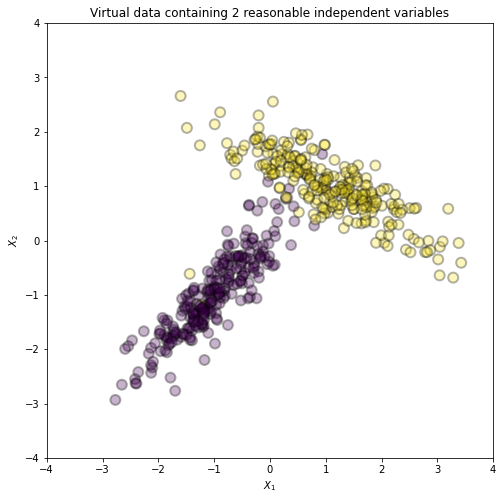

In [62]:
# 2개의 독립변수를 가진 가상 데이터
plt.figure(figsize=(8, 8))
plt.title("Virtual data containing 2 reasonable independent variables")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1, random_state=6)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

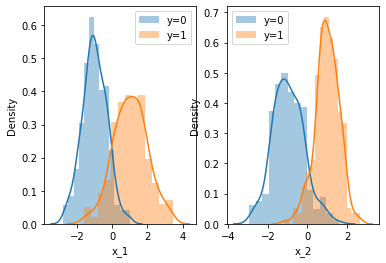

In [32]:
# x_! 의 사례
plt.subplot(121)
sns.distplot(X[y==0, 0], label="y=0")
sns.distplot(X[y==1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")

# x_2 의 사례
plt.subplot(122)
sns.distplot(X[y==0, 1], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")

plt.show()

## 데이터 분포를 회전

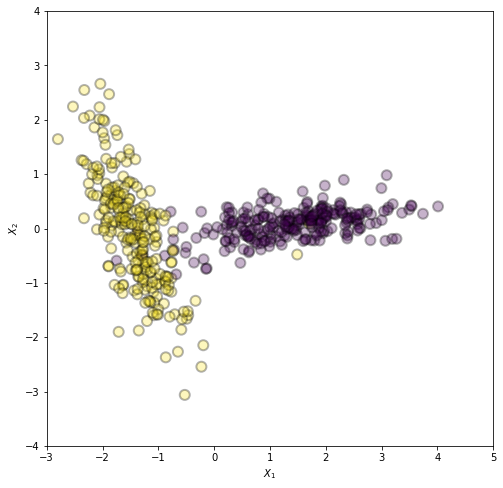

In [63]:
l, V =np.linalg.eig(X.T @ X)
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

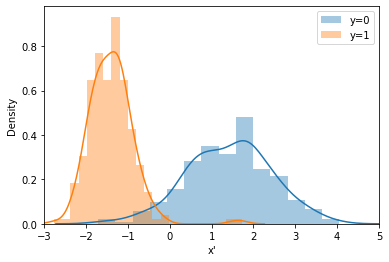

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y==0], label="y=0")
sns.distplot(X_pca[y==1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3, 5)
plt.show()

# 비대칭 데이터 생성


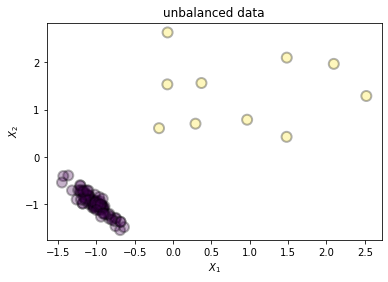

In [60]:
# 비대칭 데이터 9:1  비율로 불균형 데이터를 생성한다.
plt.title("unbalanced data")
X, y = make_classification(n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1, random_state=6,
                          weights=[0.9, 0.1])
val, cat = np.unique(y, return_counts=True)

plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# 동일 클래스내 군집 분리

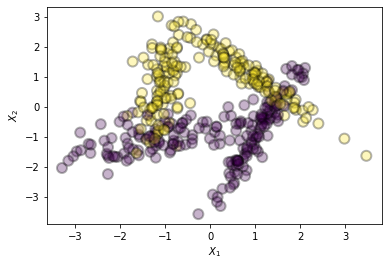

In [59]:
X, y = make_classification(n_samples=400, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=2, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

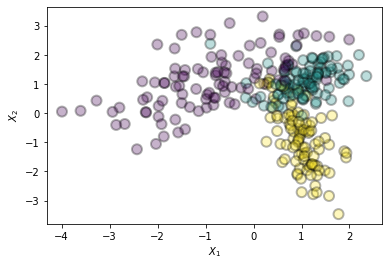

In [58]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# make_blobs
- 동방성 가우시안 정규분포를 이용하여 가상 데이터를 생성한다.
- (동방성 : 모든 방향으로 같은 성질을 가진다.)
- **주요함수인자**
  - <span style="color:red">**n_samples**</span> : 표본 데이터의 수. (디폴트:100)
  - <span style="color:red">**n_features**</span> : 독립 변수의 수. (디폴트:20)
  - <span style="color:red">**centers**</span> : 생성할 클러스터의 수. (디폴트:2)
  - cluster_std : 클러스터의 표준편차 (디폴트:1.0)
  - center_box : 생성할 클러스터의 바운딩 박스 (디폴트:-10.0)
  - **[n_samples, n_features]** 크기의 배열이 생성된다.
  

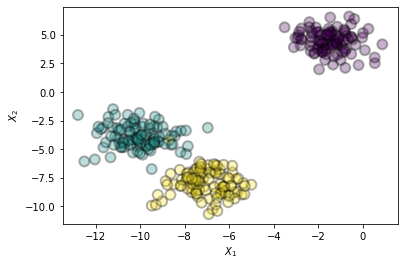

In [66]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# make_moon
- 초승달 모양의 클러스터 두 개를 가지는 데이터를 생성한다.
- **주요함수인자**
  - <span style="color:red">**n_samples**</span> : 표본 데이터의 수. (디폴트:100)
  - <span style="color:red">**noise**</span> : 잡음의 크기 0이면 정확한 반원을 그림

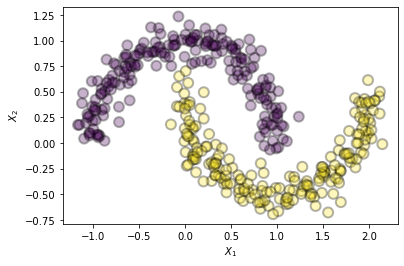

In [68]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# make_gaussian_quantiles
- 다차원 가우시간 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리시킨다.
- **주요함수인자**
  - **mean**</span> : 기대값 벡터
  - **cov**</span> : 공분산 행렬
  - <span style="color:red">**n_samples**</span> : 표본 데이터의 수. (디폴트:100)
  - <span style="color:red">**n_features**</span> : 독립변수의 수. (디폴트:20)
  - <span style="color:red">**n_classes**</span> : 클래스의 수


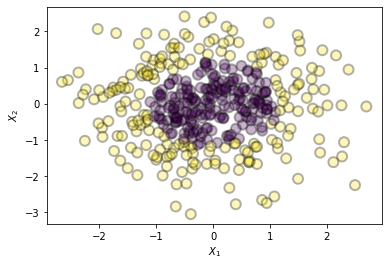

In [69]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
          s=100, edgecolor="k", linewidth=2, alpha=0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()